In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/Fact_bookings.xlsx'

# Read the file into a DataFrame
df = pd.read_excel(file_path)

# Check for missing values in the entire DataFrame
are_there_missing_values = df.isnull().values.any()

# Print the result
if are_there_missing_values:
    print("There are missing values in the DataFrame.")

    # Display the count of missing values in each column
    print("\nMissing values in each column:")
    print(df.isnull().sum())
else:
    print("There are no missing values in the DataFrame.")


There are missing values in the DataFrame.

Missing values in each column:
booking_id                 0
property_id                0
booking_date               0
Month Name                 0
Day Name                   0
weekday                    0
no_guests                  0
room_category              0
booking_platform           0
ratings_given            673
booking_status           100
Booking status           100
revenue_generated        100
revenue_realized         100
Revenue_lost             100
Week of Year             100
No of Days               100
dim_rooms                  0
property_name              0
category                   0
city                       0
successful_bookings      100
capacity                 100
Unsuccessful_bookings    100
dtype: int64


In [ ]:
df.shape

(1100, 24)

In [ ]:
df.dtypes

booking_id                object
property_id                int64
booking_date              object
Month Name                object
Day Name                  object
weekday                   object
no_guests                  int64
room_category             object
booking_platform          object
ratings_given            float64
booking_status            object
Booking status           float64
revenue_generated        float64
revenue_realized         float64
Revenue_lost             float64
Week of Year             float64
No of Days               float64
dim_rooms                 object
property_name             object
category                  object
city                      object
successful_bookings      float64
capacity                 float64
Unsuccessful_bookings    float64
dtype: object

<ipython-input-10-bb581b00d515>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


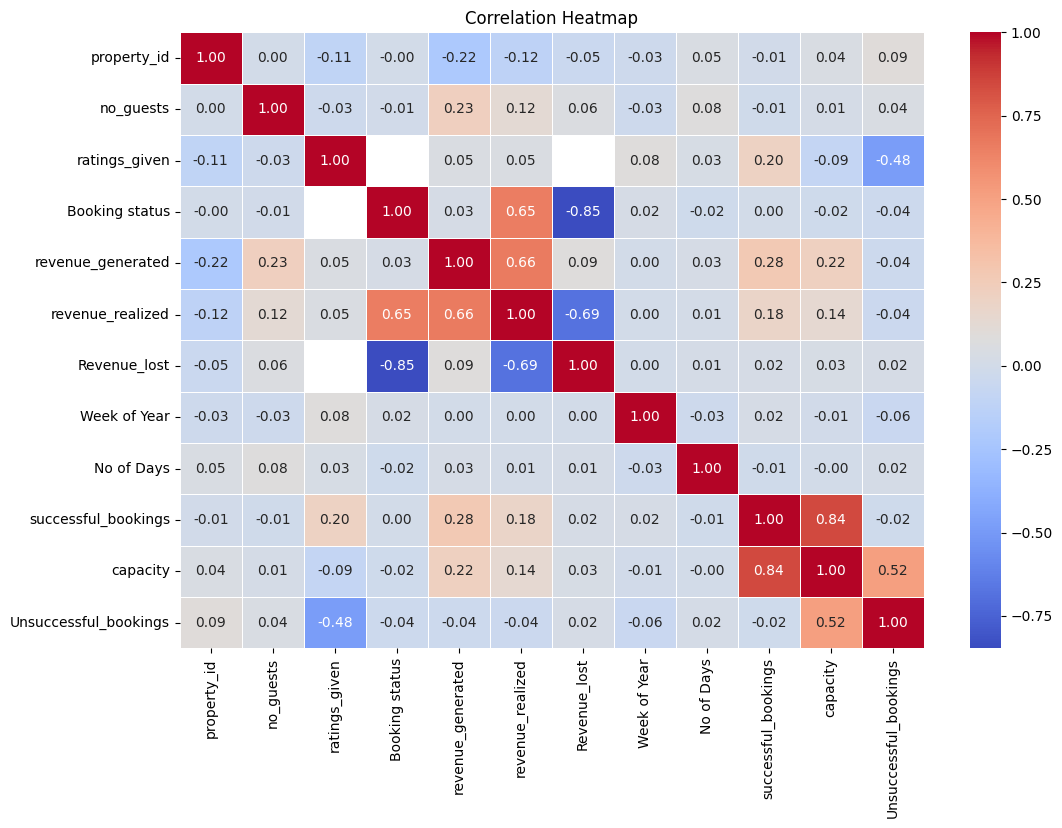

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Impute Based on Grouping for Ratings_given

In [ ]:
df['ratings_given'] = df.groupby('room_category')['ratings_given'].transform(lambda x: x.fillna(x.mean()))

Mean imputation for no of days

In [ ]:
average_stay_duration = df['No of Days'].mean()
df['No of Days'].fillna(average_stay_duration, inplace=True)
# print(df.isnull().sum())


Impute Based on Date Information for week of year

In [ ]:
# Convert 'booking_date' to datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])

# Extract the week of the year
df['Week of Year'] = df['booking_date'].dt.isocalendar().week

<ipython-input-4-8fa243bc998d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['booking_date'] = pd.to_datetime(df['booking_date'])


In [ ]:
# # Example using pandas
# df['city'] = df.groupby('property_id')['city'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Assuming 'df' is your DataFrame


In [ ]:
# df['property_name'] = df.groupby('property_id')['property_name'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# df['category'] = df.groupby('property_id')['category'].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [ ]:
# mean_capacity = df['capacity'].mean()
# df['capacity'].fillna(mean_capacity, inplace=True)

Impute based on room category for dim rooms

In [ ]:
# df['dim_rooms'] = df.groupby('room_category')['dim_rooms'].transform(lambda x: x.fillna(x.mode()))

room_category_mapping = {'R1': 'Standard', 'R2': 'Elite', 'R3': 'Premium'}

# Map values in 'dim_room' column where missing
df.loc[df['dim_rooms'].isnull(), 'dim_rooms'] = df.loc[df['dim_rooms'].isnull(), 'room_category'].map(room_category_mapping)


Impute based on room category and dim room for capacity

In [ ]:
df['capacity'] = df.groupby('room_category')['capacity'].transform(lambda x: x.fillna(x.median()))

Impute based on capacity for successful and unsuccessful bookings

In [ ]:
df['successful_bookings'] = df.groupby('capacity')['successful_bookings'].transform(lambda x: x.fillna(x.median()))
df['Unsuccessful_bookings'] = df.groupby('capacity')['Unsuccessful_bookings'].transform(lambda x: x.fillna(x.median()))


In [ ]:
print(df.isnull().sum())

booking_id                 0
property_id                0
booking_date               0
Month Name                 0
Day Name                   0
weekday                    0
no_guests                  0
room_category              0
booking_platform           0
ratings_given              0
booking_status           100
Booking status           100
revenue_generated        100
revenue_realized         100
Revenue_lost             100
Week of Year               0
No of Days                 0
dim_rooms                100
property_name              0
category                   0
city                       0
successful_bookings        0
capacity                   0
Unsuccessful_bookings      0
dtype: int64


Impute with mode for booking_status

In [ ]:
mode_booking_status = df['booking_status'].mode().iloc[0]
df['booking_status'].fillna(mode_booking_status, inplace=True)

Drop Booking status

In [ ]:
df.drop('Booking status', axis=1, inplace=True)

impute based on booking status for revenue realized

In [ ]:
df['revenue_realized'] = df.groupby('booking_status')['revenue_realized'].transform(lambda x: x.fillna(x.mean()))

Regression based on revenue realised for revenue generated

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Drop rows where both 'revenue_generated' and 'revenue_realized' are missing
df_regression = df.dropna(subset=['revenue_generated', 'revenue_realized'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression[['revenue_realized']], df_regression['revenue_generated'], test_size=0.2, random_state=42)

# Train a linear regression model
model_revenue_generated = LinearRegression()
model_revenue_generated.fit(X_train, y_train)

# Predict missing values
predicted_revenue_generated = model_revenue_generated.predict(df[df['revenue_generated'].isnull()][['revenue_realized']])

# Fill in missing values
df.loc[df['revenue_generated'].isnull(), 'revenue_generated'] = predicted_revenue_generated

Impute based on revenue generated for revenue lost

In [ ]:
# Handle missing values for 'revenue_generated' and 'revenue_realized'
df['revenue_generated'].fillna(df['revenue_realized'], inplace=True)

# Calculate 'Revenue_lost' as the difference
df['Revenue_lost'] = df['revenue_generated'] - df['revenue_realized']


In [ ]:
print(df.isnull().sum())

booking_id                 0
property_id                0
booking_date               0
Month Name                 0
Day Name                   0
weekday                    0
no_guests                  0
room_category              0
booking_platform           0
ratings_given              0
booking_status             0
revenue_generated          0
revenue_realized           0
Revenue_lost               0
Week of Year               0
No of Days                 0
dim_rooms                  0
property_name            100
category                 100
city                     100
successful_bookings        0
capacity                   0
Unsuccessful_bookings      0
dtype: int64


In [ ]:
output_file_path = 'Fact_bookings_cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)


Box plot

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assume 'df' is your DataFrame
# plt.figure(figsize=(12, 8))

# # Create a box plot for each numerical column
# sns.boxplot(data=df, orient='v')  # 'orient' can be 'h' for horizontal or 'v' for vertical

# plt.title('Box Plot of Data')
# plt.show()


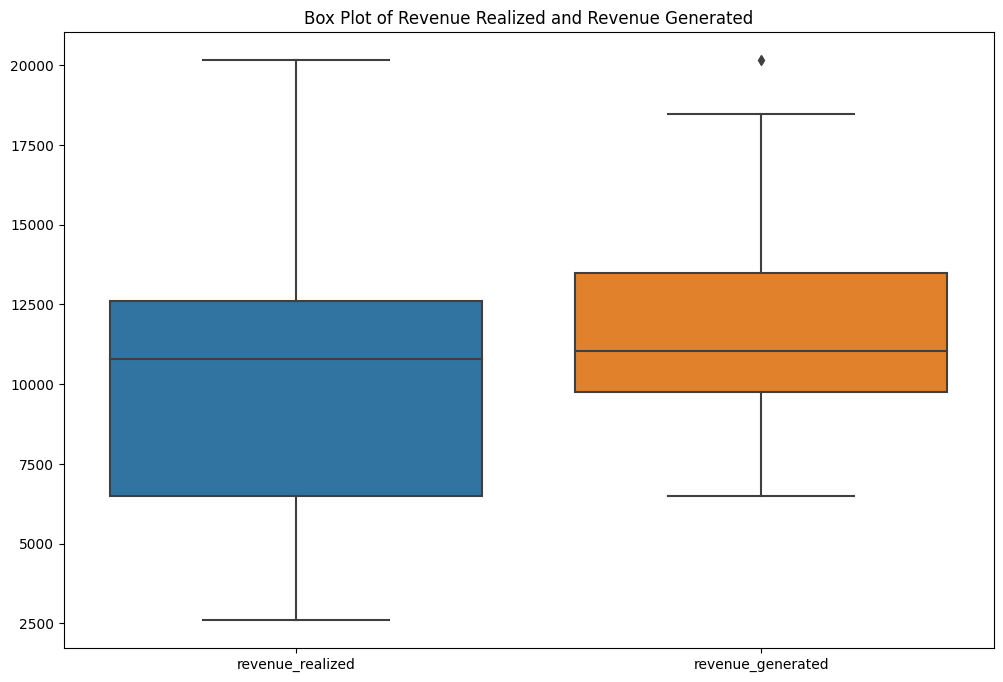

In [ ]:
plt.figure(figsize=(12, 8))

# Create a box plot for specific columns
sns.boxplot(data=df[['revenue_realized', 'revenue_generated']])

plt.title('Box Plot of Revenue Realized and Revenue Generated')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame

# # Create a box plot for 'revenue_lost'
# plt.figure(figsize=(10, 6))
# plt.boxplot(df['Revenue_lost'].dropna(), vert=False)
# plt.title('Box Plot for Revenue Lost')
# plt.xlabel('Revenue Lost')
# plt.show()

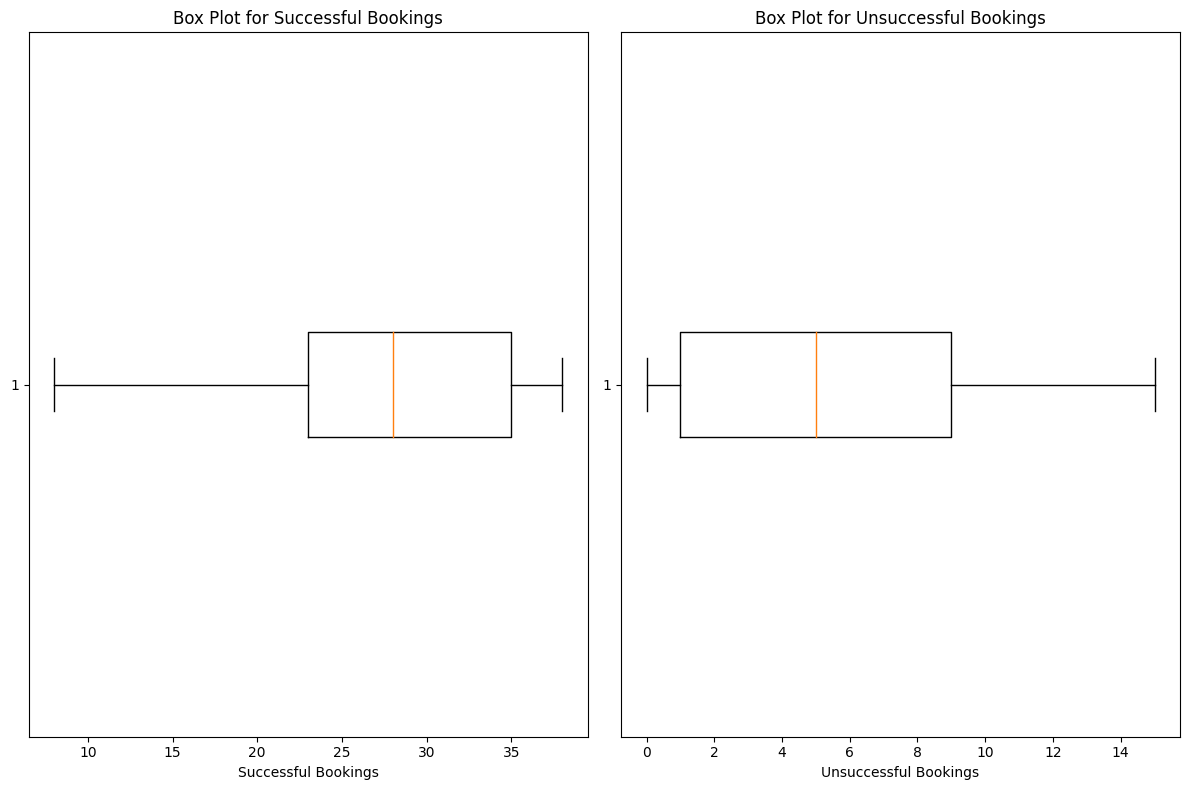

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create box plots for 'successful_bookings' and 'Unsuccessful_bookings'
plt.figure(figsize=(12, 8))

# Box plot for 'successful_bookings'
plt.subplot(1, 2, 1)
plt.boxplot(df['successful_bookings'].dropna(), vert=False)
plt.title('Box Plot for Successful Bookings')
plt.xlabel('Successful Bookings')

# Box plot for 'Unsuccessful_bookings'
plt.subplot(1, 2, 2)
plt.boxplot(df['Unsuccessful_bookings'].dropna(), vert=False)
plt.title('Box Plot for Unsuccessful Bookings')
plt.xlabel('Unsuccessful Bookings')

plt.tight_layout()
plt.show()


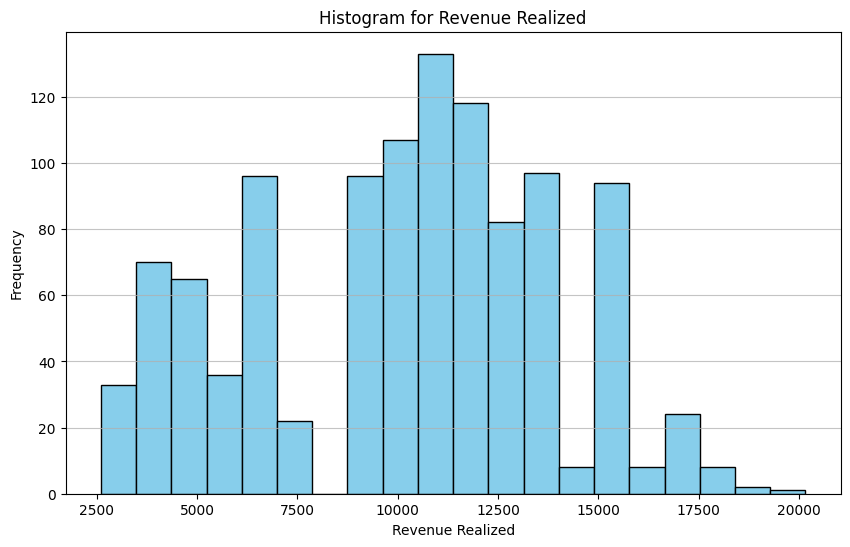

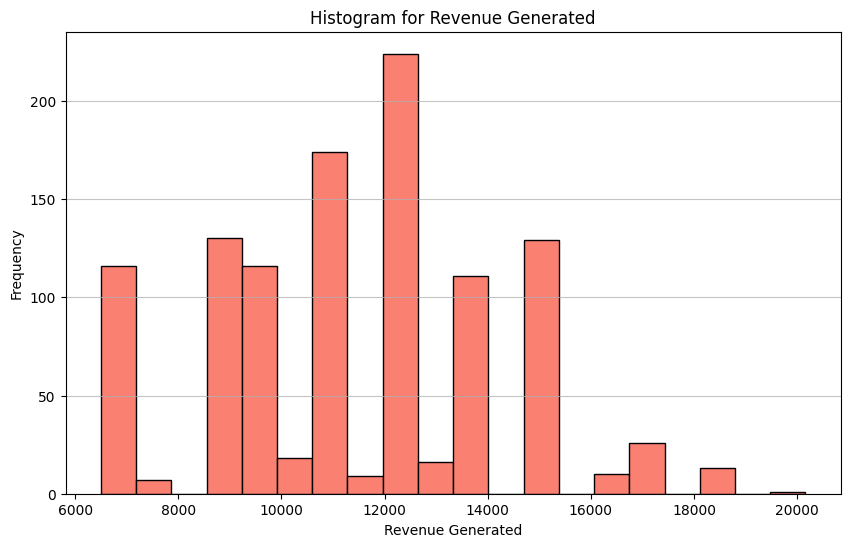

In [ ]:
import matplotlib.pyplot as plt


# Plot histogram for 'revenue_realized'
plt.figure(figsize=(10, 6))
plt.hist(df['revenue_realized'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Revenue Realized')
plt.xlabel('Revenue Realized')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot histogram for 'revenue_generated'
plt.figure(figsize=(10, 6))
plt.hist(df['revenue_generated'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram for Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame

# # Create a histogram for 'revenue_lost'
# plt.figure(figsize=(10, 6))
# plt.hist(df['Revenue_lost'].dropna(), bins=20, color='skyblue', edgecolor='black')
# plt.title('Histogram for Revenue Lost')
# plt.xlabel('Revenue Lost')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()
